In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D, BatchNormalization
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import *
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader

#Transformers
from module import *

####################################CHANGE THE LINK BY YOUR OWN#######################################################################################
model_series_3s           = './seriesTrCNN_3s'
######################################################################################################################################################

xtest = r"data/testing_sample2_3s.csv.gz"
ytest = r"data/testing_label_3s.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(ytest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
y_test = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(xtest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
x_test = samplesdf.to_numpy()

def get_report_series():
  old_model = tf.keras.models.load_model(model_series_3s)
  # Check its architecture #old_model.summary()#old_model.summary()
  testresult=old_model.predict(x_test)#for series and traditional model
  fpr, tpr, _ = roc_curve(y_test,testresult)
  precision, recall, _ = precision_recall_curve(y_test,testresult)

  """
  prc_auc = auc(recall,precision)
  ss = np.zeros((len(testresult)))
  f1s = f1_score(y_test,ss)
  """

  return [fpr,tpr,precision,recall,testresult]


In [3]:
fpr,tpr,precision,recall,testresult = get_report_series()

In [19]:
lw = 2
roc_auc = auc(fpr,tpr)
prc_auc = auc(recall,precision)

In [28]:
yt2 = r"data/lassolb3.csv.gz"
pd2 = r"data/lassopredict3.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt2,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_2 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd2,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_2 = samplesdf.to_numpy()

fpr2, tpr2, _ = roc_curve(yt_2,pd_2)
precision2, recall2, _ = precision_recall_curve(yt_2,pd_2)
roc_auc2 = auc(fpr2,tpr2)
prc_auc2 = auc(recall2,precision2)

In [21]:
yt3 = r"data/svmlb3.csv.gz"
pd3 = r"data/svmpredict3.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt3,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_3 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd3,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_3 = samplesdf.to_numpy()

fpr3, tpr3, _ = roc_curve(yt_3,pd_3)
precision3, recall3, _ = precision_recall_curve(yt_3,pd_3)
roc_auc3 = auc(fpr3,tpr3)
prc_auc3 = auc(recall3,precision3)

In [30]:
yt4 = r"data/sabsablb3.csv.gz"
pd4 = r"data/sabsabpredict3.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt4,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_4 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd4,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_4 = samplesdf.to_numpy()

fpr4, tpr4, _ = roc_curve(yt_4,pd_4)
precision4, recall4, _ = precision_recall_curve(yt_4,pd_4)
roc_auc4 = auc(fpr4,tpr4)
prc_auc4 = auc(recall4,precision4)

In [33]:
yt5 = r"data/isabisablb3.csv.gz"
pd5 = r"data/isabisabpredict3.csv.gz"

samplesdf = pd.DataFrame()
for df in  pd.read_csv(yt5,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
yt_5 = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(pd5,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
pd_5 = samplesdf.to_numpy()

fpr5, tpr5, _ = roc_curve(yt_5,pd_5)
precision5, recall5, _ = precision_recall_curve(yt_5,pd_5)
roc_auc5 = auc(fpr5,tpr5)
prc_auc5 = auc(recall5,precision5)

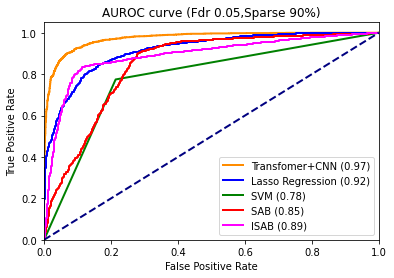

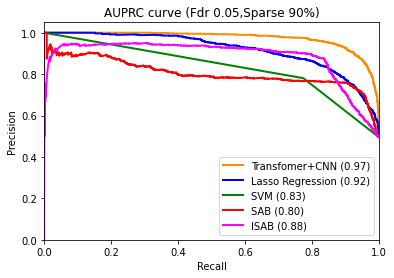

In [34]:
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='Transfomer+CNN (%0.2f)' % roc_auc)
plt.plot(fpr2,tpr2, color='blue',
         lw=lw, label='Lasso Regression (%0.2f)' % roc_auc2)
plt.plot(fpr3,tpr3, color='green',
         lw=lw, label='SVM (%0.2f)' % roc_auc3)
plt.plot(fpr4,tpr4, color='red',
         lw=lw, label='SAB (%0.2f)' % roc_auc4)
plt.plot(fpr5,tpr5, color='magenta',
         lw=lw, label='ISAB (%0.2f)' % roc_auc5)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC curve (Fdr 0.05,Sparse 90%)')
plt.legend(loc="lower right")
plt.show()

plt.plot(recall,precision, color='darkorange',
         lw=lw, label='Transfomer+CNN (%0.2f)' % prc_auc)
plt.plot(recall2,precision2, color='blue',
         lw=lw, label='Lasso Regression (%0.2f)' % prc_auc2)
plt.plot(recall3,precision3, color='green',
         lw=lw, label='SVM (%0.2f)' % prc_auc3)
plt.plot(recall4,precision4, color='red',
         lw=lw, label='SAB (%0.2f)' % prc_auc4)
plt.plot(recall5,precision5, color='magenta',
         lw=lw, label='ISAB (%0.2f)' % prc_auc5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC curve (Fdr 0.05,Sparse 90%)')
plt.legend(loc="lower right")
plt.show()